This notebook performs EDA on the created ASPAs.  

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt

import keijzer_exogan as ke

from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm

%matplotlib inline
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"} # Make sure the axis background of plots is white, this is usefull for the black theme in JupyterLab

# Initialize default seaborn layout
sns.set_palette(sns.hls_palette(8, l=.3, s=.8))
sns.set(style='ticks') 

In [2]:
%%time
#path = '/datb/16011015/ExoGAN_data/selection//' #notice how you dont put the last folder in here...
#images = np.load(path+'first_chunks_25_percent_images_v4.1.npy').astype('float32')

path = '/shared/datasets/16011015/MakeAI_SURFsara/ASPAs/'
images = np.load(path+'MakeAI_train_complex_2.npy').astype('float32')


len(images)

CPU times: user 112 ms, sys: 719 ms, total: 831 ms
Wall time: 829 ms


In [3]:
images.shape

(100000, 1, 32, 32)

In [4]:
images = images.reshape([images.shape[0], 32, 32]) # remove the channel dimension

In [5]:
clean_images = []

for image in tqdm(images):
    if not(np.isnan(image).any() or np.isinf(image).any()):
        clean_images.append(image)
        
len(clean_images)

100%|██████████| 100000/100000 [00:00<00:00, 110848.75it/s]


100000

In [6]:
# Plot some images

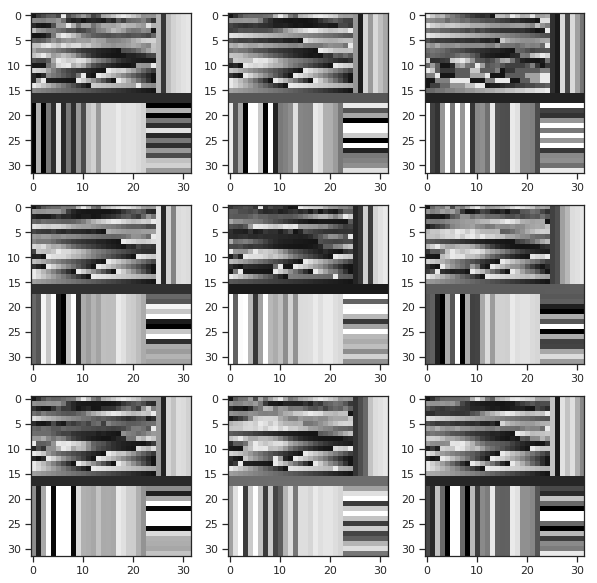

In [7]:
plt.figure(figsize=(10,10))
for i in range(9):
    n = np.random.randint(0, len(images)) # make sure the 9 images are a random selection
    img = images[n]
    plt.subplot(3,3,i+1)
    plt.imshow(img, cmap='gray', vmin=-1.2, vmax=1.2)

# Looking at the params

(-2.0222764, 1.5315053)

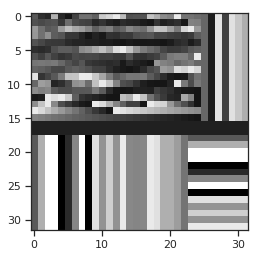

In [8]:
img = images[0] # select one image
plt.imshow(img, cmap='gray', vmin=-1.2, vmax=1.2)

img.min(), img.max()

In [9]:
params = ['planet_mass','temp_profile','ch4_mixratio','planet_radius','h2o_mixratio','co2_mixratio','co_mixratio']

In [10]:
%%time
params_values = [images[:, :16, 25+i:26+i].mean(1) for i in tqdm(range(len(params)))] # select param line, take mean of line, make list of all lines in ndarray per param

params_values_mean = [val.mean() for val in params_values] # mean of all values per param
params_values_std = [val.std() for val in params_values] # std of all values per param

100%|██████████| 7/7 [00:00<00:00, 32.24it/s]

CPU times: user 192 ms, sys: 33.3 ms, total: 225 ms
Wall time: 222 ms


In [11]:
for i,param in enumerate(params):
    print(param+' \t mean: %.1f \t std: %.2f'% (params_values_mean[i], params_values_std[i]))

planet_mass 	 mean: 0.0 	 std: 0.57
temp_profile 	 mean: -0.7 	 std: 0.23
ch4_mixratio 	 mean: 0.7 	 std: 0.26
planet_radius 	 mean: 0.1 	 std: 0.51
h2o_mixratio 	 mean: 0.8 	 std: 0.08
co2_mixratio 	 mean: 0.7 	 std: 0.27
co_mixratio 	 mean: 0.6 	 std: 0.47


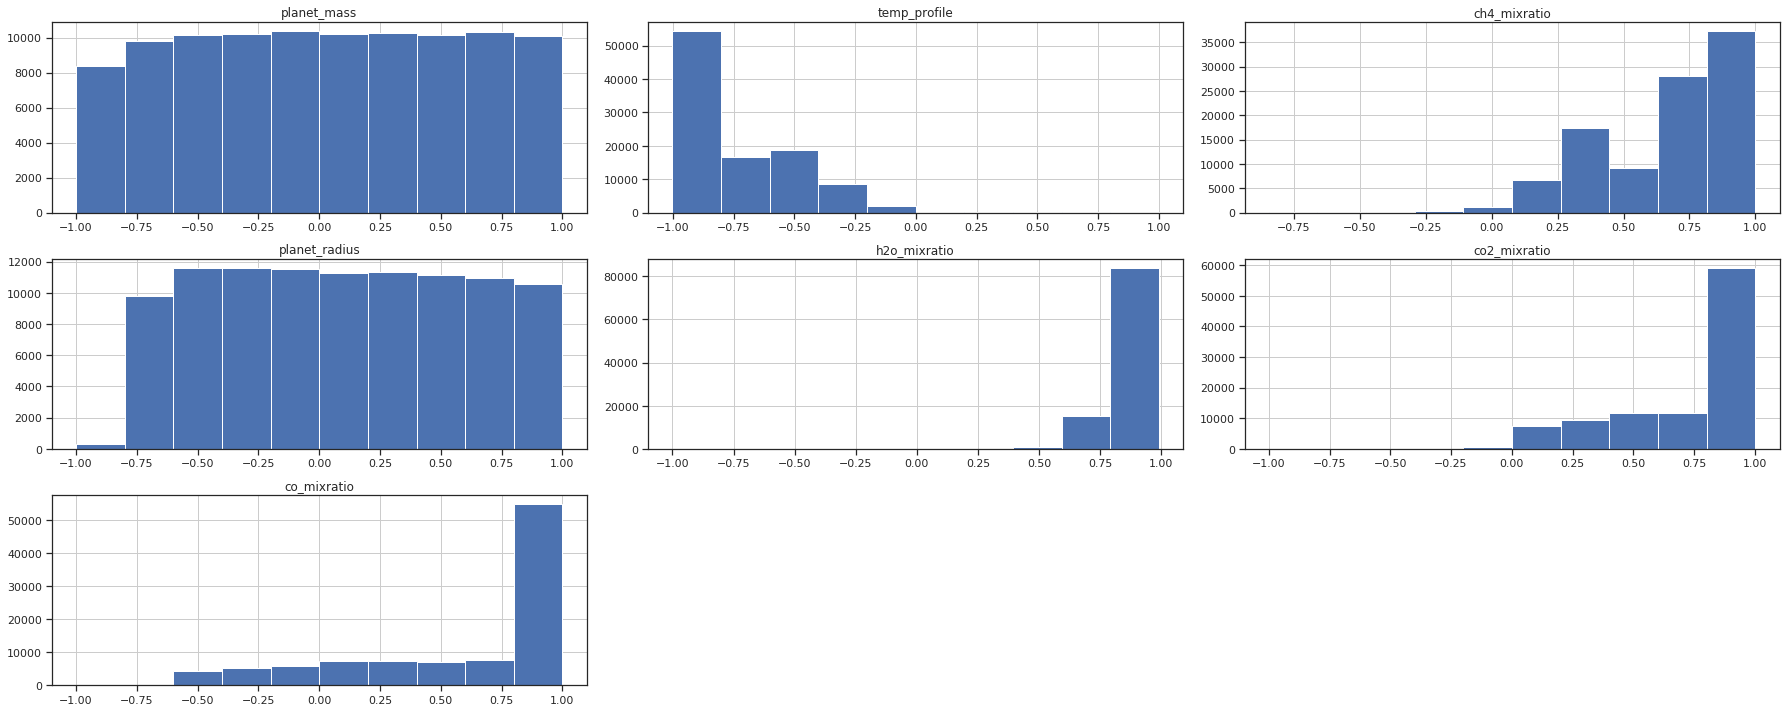

In [12]:
plt.figure(figsize=((25,10)))
for i,param_values in enumerate(params_values):
    plt.subplot(3,3,i+1)
    plt.title(params[i])
    plt.hist(param_values, bins=10)
    plt.grid()
    plt.tight_layout()

# General ASPA statistics

In [13]:
%%time

mean = images.mean()
std = images.std()
min_ = images.min()
max_= images.max()

print('mean: ', mean)
print('std: ', mean)
print('min: ', min_)
print('max: ', max_)

mean:  0.0559323
std:  0.0559323
min:  -2.507822
max:  4.9756193
CPU times: user 6.37 s, sys: 971 ms, total: 7.34 s
Wall time: 394 ms


# Spectra EDA

In [14]:
spectra = images[:, :16, :25]
spectra.shape

(100000, 16, 25)

In [15]:
mean_ = spectra.mean(0)
std_ = spectra.std(0)

# Heatmap of spectra $\mu$ and $\sigma$

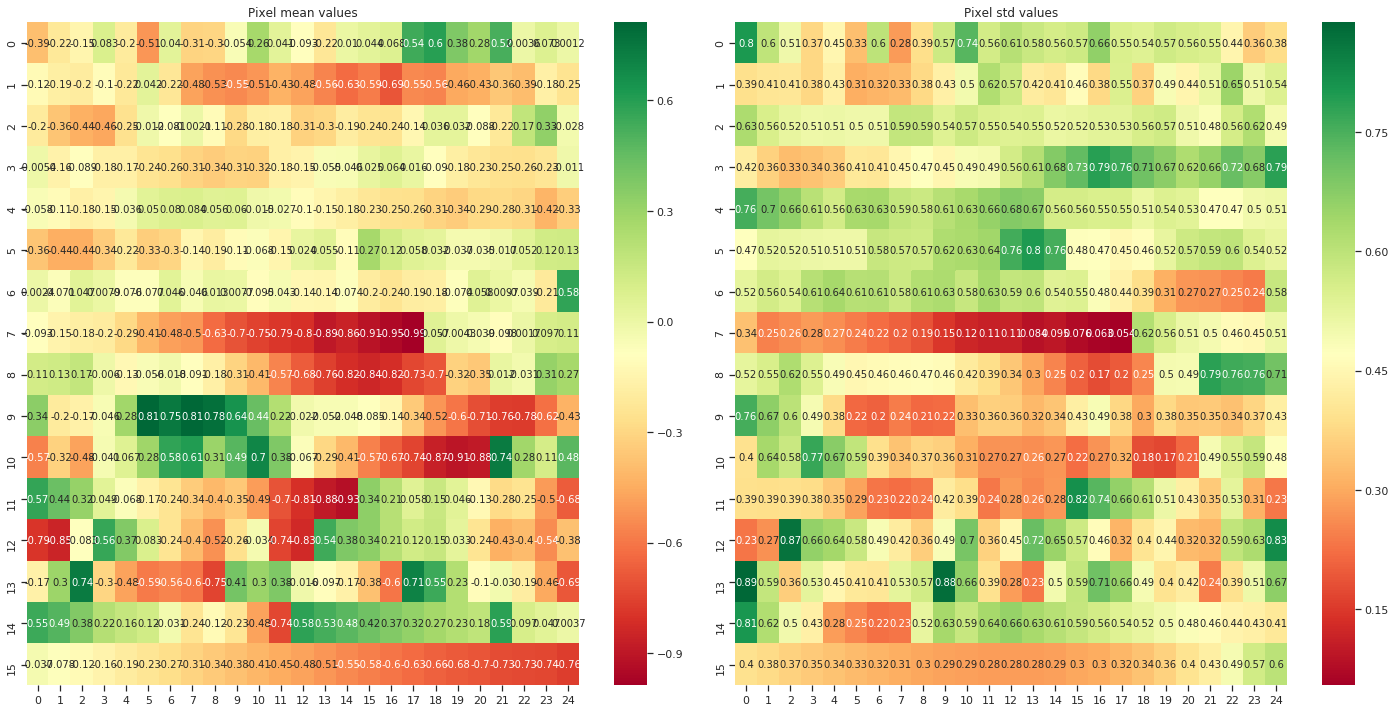

In [16]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.title('Pixel mean values')
sns.heatmap(mean_, square=False, cmap='RdYlGn', annot=True)

plt.subplot(1,2,2)
plt.title('Pixel std values')
sns.heatmap(std_, square=False, cmap='RdYlGn', annot=True)

plt.tight_layout()

In [17]:
mins_ = [images[:, 16:17, i*2:i*2+2].mean(2) for i in range(16)]

maxs_ = [images[:, 17:18, i*2:i*2+2].mean(2) for i in range(16)]

#stds_ = [images[:, 17:18, i*2:i*4+4].mean(2) for i in range(8)]

In [18]:
for i in range(16):
    print('='*100)
    print('mins %s: \t mean: %.5f \t std: %.5f \t min: %.5f \t max: %.5f'%(i, mins_[i].mean(), mins_[i].std(), mins_[i].min(), mins_[i].max()))
    #print('stds %s: \t mean: %.3f \t std: %.3f'%(i, stds_[i].mean(), stds_[i].std()))
    print('mins %s: \t mean: %.5f \t std: %.5f \t min: %.5f \t max: %.5f'%(i, maxs_[i].mean(), maxs_[i].std(), maxs_[i].min(), maxs_[i].max()))

mins 0: 	 mean: -0.59117 	 std: 0.31188 	 min: -1.00101 	 max: 4.61051
mins 0: 	 mean: -0.59073 	 std: 0.31241 	 min: -1.00100 	 max: 4.74280
mins 1: 	 mean: -0.59146 	 std: 0.31156 	 min: -1.00102 	 max: 4.57806
mins 1: 	 mean: -0.59055 	 std: 0.31254 	 min: -1.00099 	 max: 4.67926
mins 2: 	 mean: -0.59140 	 std: 0.31166 	 min: -1.00102 	 max: 4.65844
mins 2: 	 mean: -0.58975 	 std: 0.31350 	 min: -1.00099 	 max: 4.87678
mins 3: 	 mean: -0.59143 	 std: 0.31169 	 min: -1.00102 	 max: 4.71919
mins 3: 	 mean: -0.59029 	 std: 0.31295 	 min: -1.00101 	 max: 4.87559
mins 4: 	 mean: -0.59121 	 std: 0.31192 	 min: -1.00102 	 max: 4.73053
mins 4: 	 mean: -0.58948 	 std: 0.31386 	 min: -1.00100 	 max: 4.97562
mins 5: 	 mean: -0.59098 	 std: 0.31219 	 min: -1.00100 	 max: 4.76931
mins 5: 	 mean: -0.58998 	 std: 0.31329 	 min: -1.00099 	 max: 4.83054
mins 6: 	 mean: -0.59092 	 std: 0.31226 	 min: -1.00100 	 max: 4.78490
mins 6: 	 mean: -0.59012 	 std: 0.31315 	 min: -1.00099 	 max: 4.83635
mins 7

# Mean and STD of all ASPAs per pixel

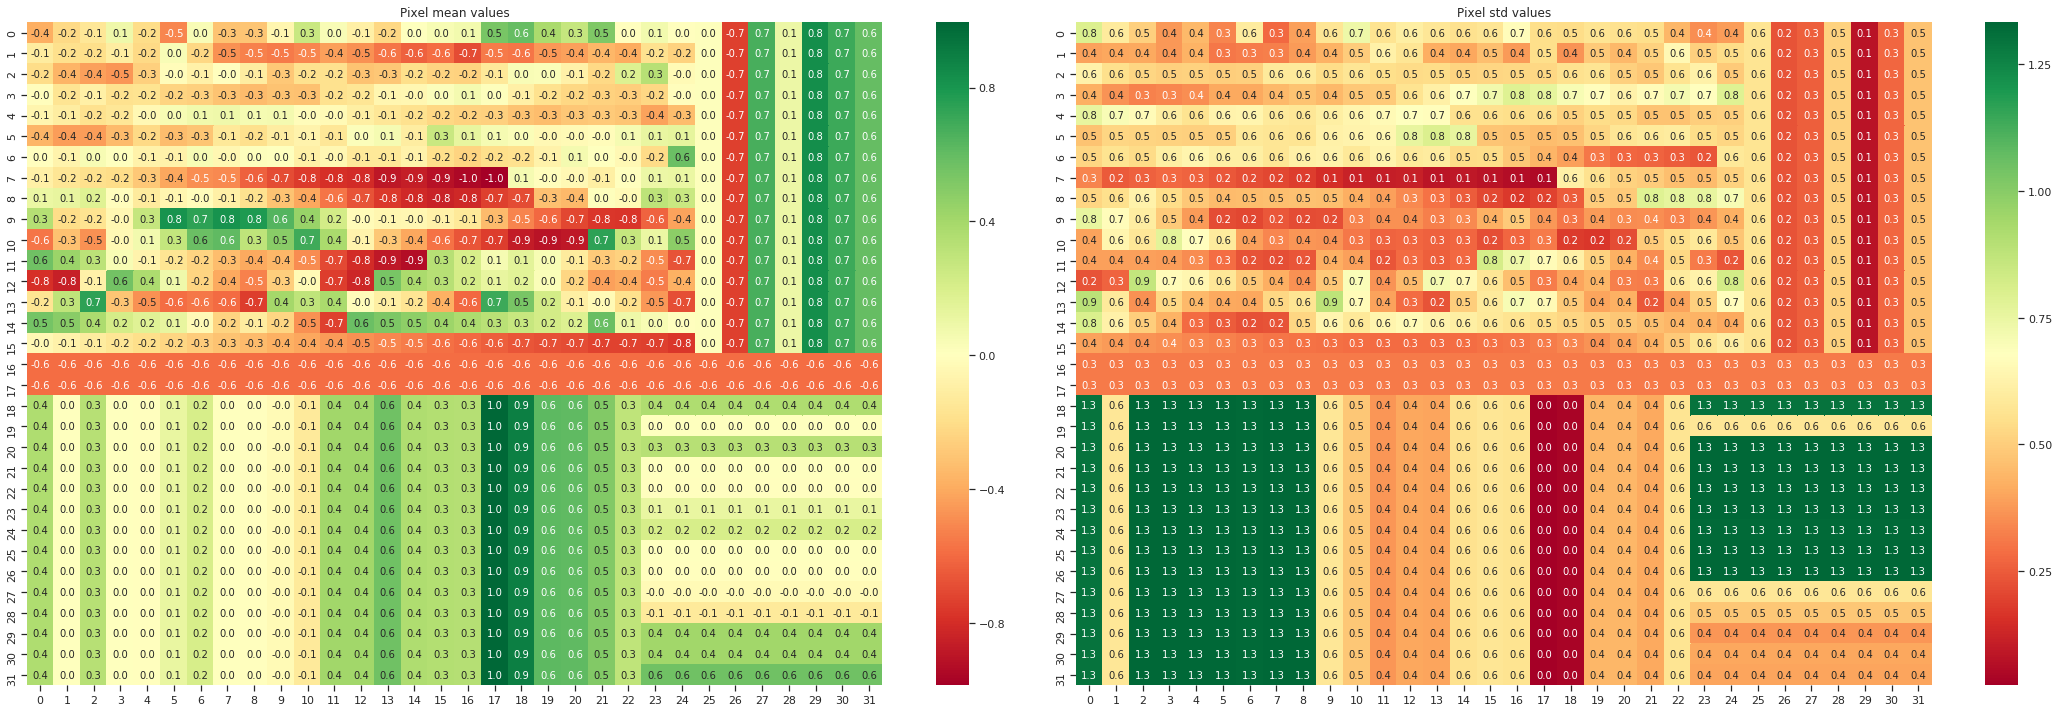

In [19]:
plt.figure(figsize=(30,10))

plt.subplot(1,2,1)
plt.title('Pixel mean values')
sns.heatmap(images[:, :, :].mean(0), square=False, cmap='RdYlGn', annot=True, fmt='.1f')

plt.subplot(1,2,2)
plt.title('Pixel std values')
sns.heatmap(images[:, :, :].std(0), square=False, cmap='RdYlGn', annot=True, fmt='.1f')

plt.tight_layout()

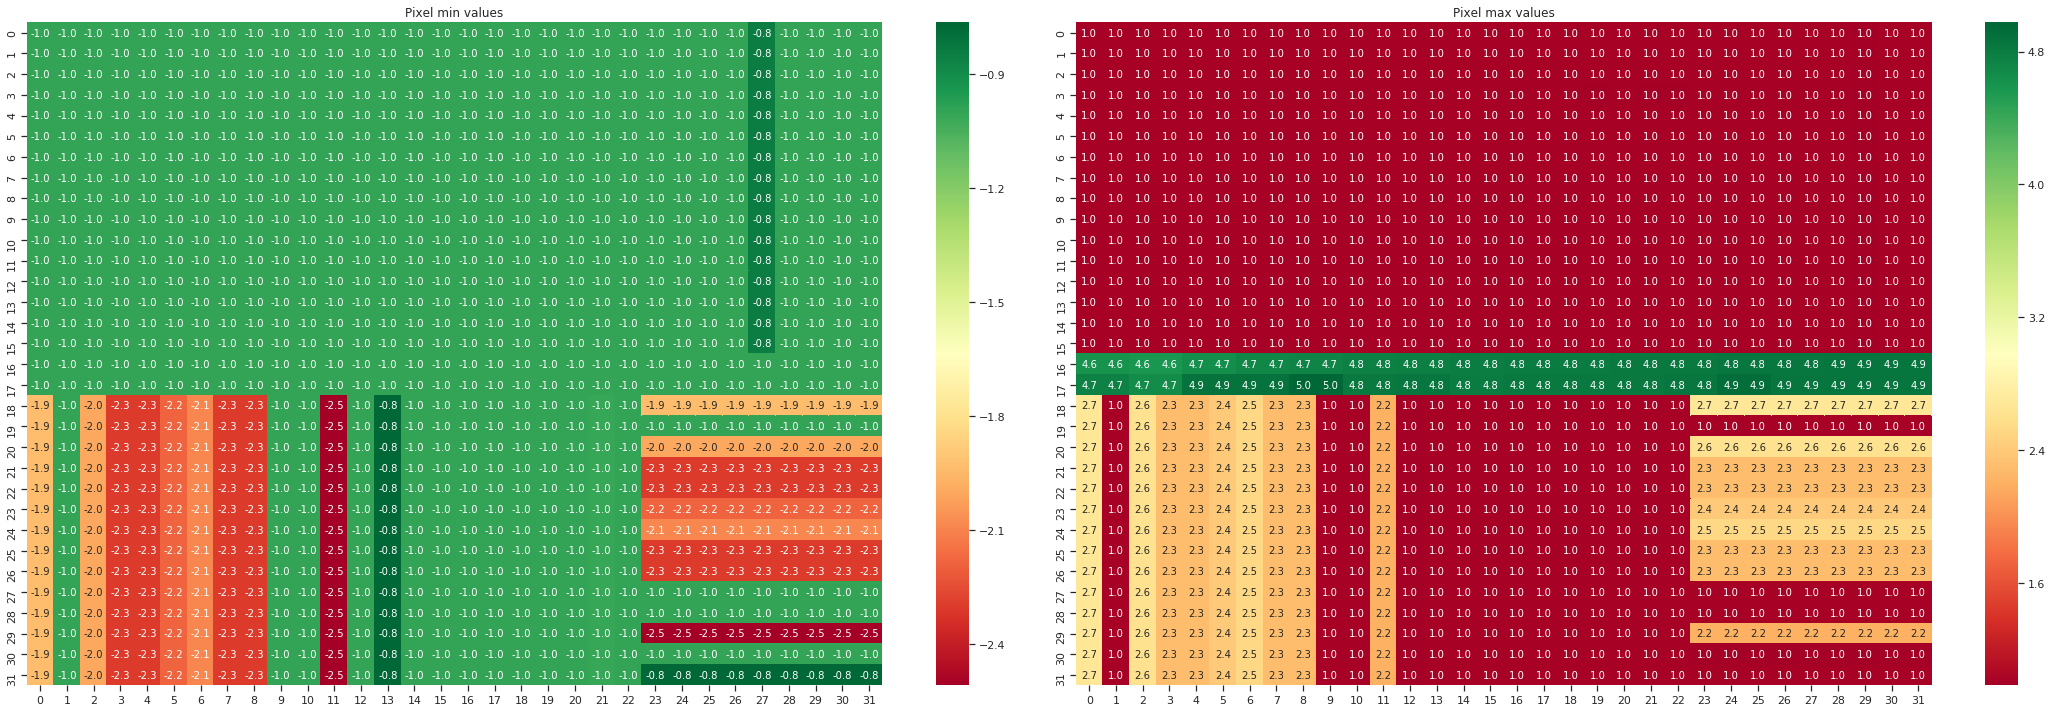

In [20]:
plt.figure(figsize=(30,10))

plt.subplot(1,2,1)
plt.title('Pixel min values')
sns.heatmap(images[:, :, :].min(0), square=False, cmap='RdYlGn', annot=True, fmt='.1f')

plt.subplot(1,2,2)
plt.title('Pixel max values')
sns.heatmap(images[:, :, :].max(0), square=False, cmap='RdYlGn', annot=True, fmt='.1f')

plt.tight_layout()

# EDA on individual spectra bins

In [21]:
spectra.shape

(100000, 16, 25)

100%|██████████| 400/400 [00:10<00:00, 39.94it/s]


CPU times: user 19.7 s, sys: 512 ms, total: 20.2 s
Wall time: 20.1 s


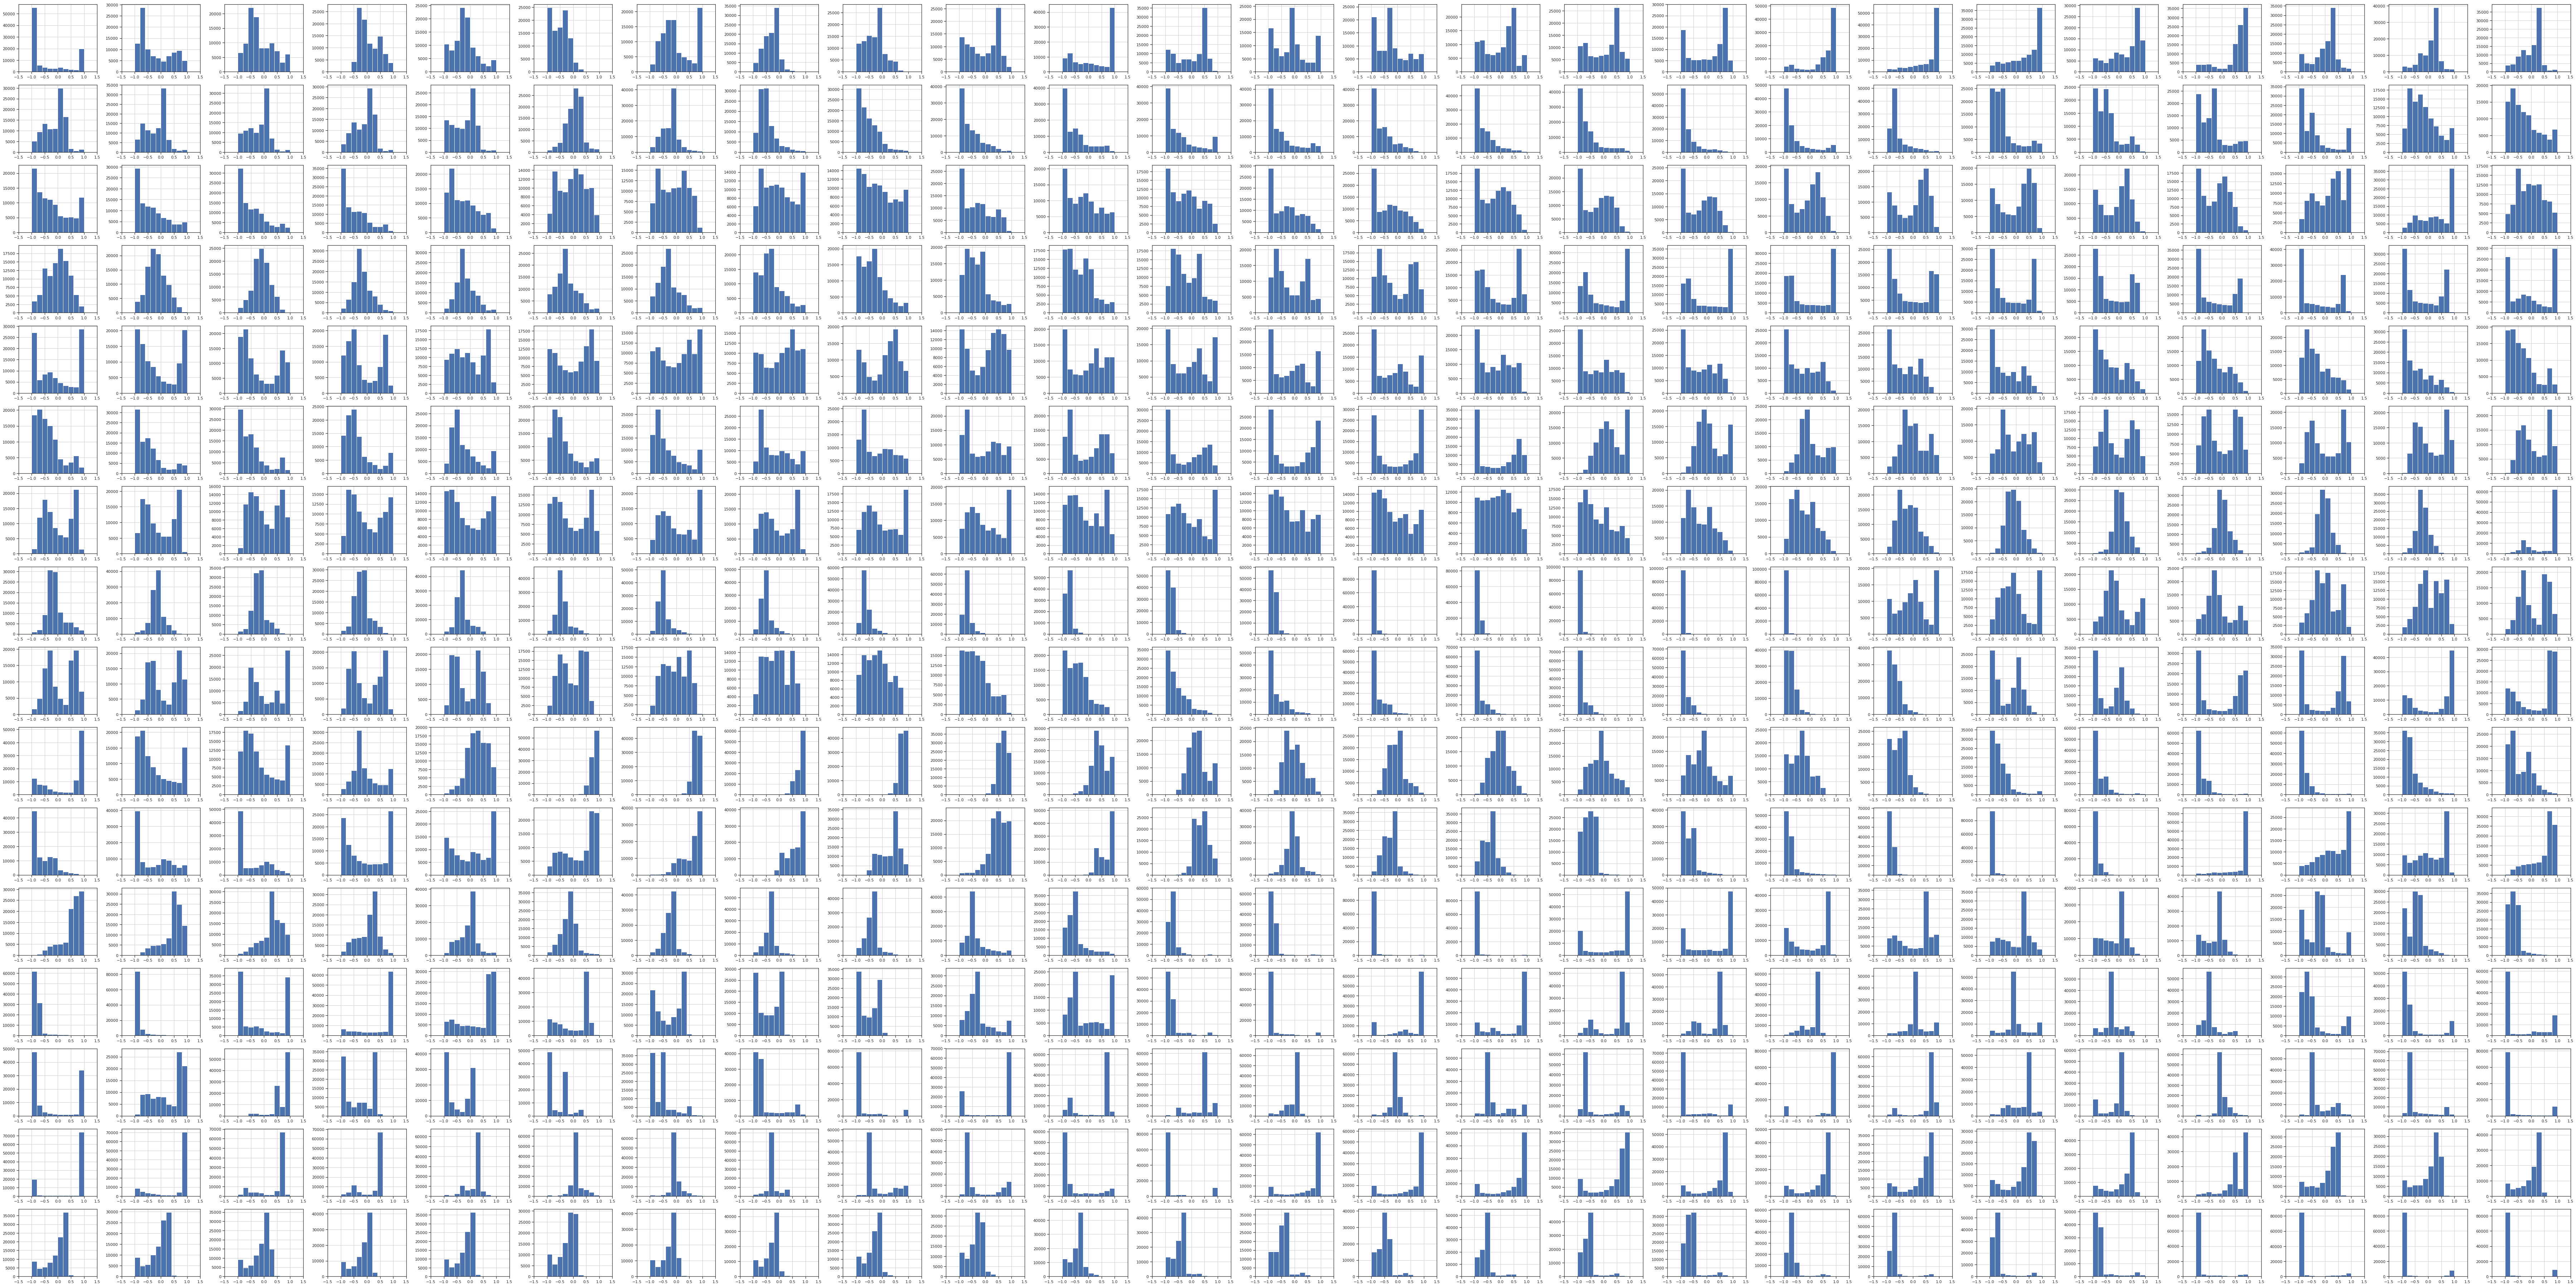

In [22]:
%%time
spec = spectra.flatten()
plt.figure(figsize=(100,50))

row_value = 0
column_value = 0

for i in tqdm(range(25*16)):
    
    if (i % 25 == 0) and i != 0: # move one row down at end of column and reset row value 
        #print('set to 0')
        row_value = 0
        column_value += 1
    
    plt.subplot(16,25,i+1)
    #plt.title('Bin %s' % (i+1))
    plt.hist(spectra[:, column_value, row_value], bins=10)
    plt.grid()
    plt.xlim((-1.5,1.5))
    
    row_value += 1
    
plt.tight_layout()

In [23]:
spec.shape

(40000000,)